In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [107]:
df = pd.read_csv("HI-Small_Trans.csv")
df.head(10)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0
5,2022/09/01 00:03,1,8000F5AD0,1,8000F5AD0,6162.44,US Dollar,6162.44,US Dollar,Reinvestment,0
6,2022/09/01 00:08,1,8000EBAC0,1,8000EBAC0,14.26,US Dollar,14.26,US Dollar,Reinvestment,0
7,2022/09/01 00:16,1,8000EC1E0,1,8000EC1E0,11.86,US Dollar,11.86,US Dollar,Reinvestment,0
8,2022/09/01 00:26,12,8000EC280,2439,8017BF800,7.66,US Dollar,7.66,US Dollar,Credit Card,0
9,2022/09/01 00:21,1,8000EDEC0,211050,80AEF5310,383.71,US Dollar,383.71,US Dollar,Credit Card,0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           object 
 1   From Bank           int64  
 2   Account             object 
 3   To Bank             int64  
 4   Account.1           object 
 5   Amount Received     float64
 6   Receiving Currency  object 
 7   Amount Paid         float64
 8   Payment Currency    object 
 9   Payment Format      object 
 10  Is Laundering       int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 426.2+ MB


In [109]:
df.isna().sum()

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64

In [84]:
object_cols = df.select_dtypes('object').columns.drop('Timestamp')
df[object_cols] = df[object_cols].astype('string')

In [85]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Timestamp           datetime64[ns]
 1   From Bank           int64         
 2   Account             string        
 3   To Bank             int64         
 4   Account.1           string        
 5   Amount Received     float64       
 6   Receiving Currency  string        
 7   Amount Paid         float64       
 8   Payment Currency    string        
 9   Payment Format      string        
 10  Is Laundering       int64         
dtypes: datetime64[ns](1), float64(2), int64(3), string(5)
memory usage: 426.2 MB


In [86]:
df.duplicated().sum()

np.int64(9)

In [87]:
len(df)

5078345

In [88]:
df.drop_duplicates()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022-09-01 00:20:00,10,8000EBD30,10,8000EBD30,3697.340000,US Dollar,3697.340000,US Dollar,Reinvestment,0
1,2022-09-01 00:20:00,3208,8000F4580,1,8000F5340,0.010000,US Dollar,0.010000,US Dollar,Cheque,0
2,2022-09-01 00:00:00,3209,8000F4670,3209,8000F4670,14675.570000,US Dollar,14675.570000,US Dollar,Reinvestment,0
3,2022-09-01 00:02:00,12,8000F5030,12,8000F5030,2806.970000,US Dollar,2806.970000,US Dollar,Reinvestment,0
4,2022-09-01 00:06:00,10,8000F5200,10,8000F5200,36682.970000,US Dollar,36682.970000,US Dollar,Reinvestment,0
...,...,...,...,...,...,...,...,...,...,...,...
5078340,2022-09-10 23:57:00,54219,8148A6631,256398,8148A8711,0.154978,Bitcoin,0.154978,Bitcoin,Bitcoin,0
5078341,2022-09-10 23:35:00,15,8148A8671,256398,8148A8711,0.108128,Bitcoin,0.108128,Bitcoin,Bitcoin,0
5078342,2022-09-10 23:52:00,154365,8148A6771,256398,8148A8711,0.004988,Bitcoin,0.004988,Bitcoin,Bitcoin,0
5078343,2022-09-10 23:46:00,256398,8148A6311,256398,8148A8711,0.038417,Bitcoin,0.038417,Bitcoin,Bitcoin,0


In [89]:
df['Same Account'] = df['Account']==df['Account.1']

In [90]:
df['Same Bank'] = df['From Bank']==df['To Bank']

In [91]:
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Same Account,Same Bank
0,2022-09-01 00:20:00,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0,True,True
1,2022-09-01 00:20:00,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0,False,False
2,2022-09-01 00:00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0,True,True
3,2022-09-01 00:02:00,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0,True,True
4,2022-09-01 00:06:00,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0,True,True


In [92]:
df['Is Laundering'].value_counts()

Is Laundering
0    5073168
1       5177
Name: count, dtype: int64

same account, different account

In [93]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['string','bool']).columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Same Account,Same Bank
0,2022-09-01 00:20:00,10,942,10,900,3697.34,12,3697.34,12,5,0,1,1
1,2022-09-01 00:20:00,3208,990,1,949,0.01,12,0.01,12,3,0,0,0
2,2022-09-01 00:00:00,3209,991,3209,940,14675.57,12,14675.57,12,5,0,1,1
3,2022-09-01 00:02:00,12,997,12,945,2806.97,12,2806.97,12,5,0,1,1
4,2022-09-01 00:06:00,10,999,10,947,36682.97,12,36682.97,12,5,0,1,1


In [94]:
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Same Account,Same Bank
0,2022-09-01 00:20:00,10,942,10,900,3697.34,12,3697.34,12,5,0,1,1
1,2022-09-01 00:20:00,3208,990,1,949,0.01,12,0.01,12,3,0,0,0
2,2022-09-01 00:00:00,3209,991,3209,940,14675.57,12,14675.57,12,5,0,1,1
3,2022-09-01 00:02:00,12,997,12,945,2806.97,12,2806.97,12,5,0,1,1
4,2022-09-01 00:06:00,10,999,10,947,36682.97,12,36682.97,12,5,0,1,1


In [95]:
X = df.drop(['Is Laundering','Timestamp'],axis=1)
y = df['Is Laundering']

In [15]:
import sklearn
print(sklearn.__version__)

1.4.2


In [ ]:
!pip install imblearn

In [ ]:
pip install --upgrade scikit-learn==1.4.2

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    average_precision_score,
    precision_recall_curve,
    auc,
    precision_score,
    f1_score,
    recall_score
)
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

In [97]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)

pipe = Pipeline([('rus', RandomUnderSampler(sampling_strategy=0.2,random_state=42)),
                ('smote',SMOTE(sampling_strategy=0.5, k_neighbors=5, random_state=42))])
X_train_res, y_train_res = pipe.fit_resample(X_train, y_train)

print("Resampled training size:", X_train_res.shape)
print("Test set size (unchanged):", X_test.shape)

Resampled training size: (31065, 11)
Test set size (unchanged): (1015669, 11)


In [98]:
X_test_res, y_test_res = pipe.fit_resample(X_test, y_test)
print("Resampled Test set size:", X_test_res.shape)

Resampled Test set size: (7762, 11)


In [99]:
print("Resampled test set size:", y_test_res.shape)

Resampled test set size: (7762,)


In [105]:
count = 0
for x in y_train_res:
    if x==1:
        count+=1
print(count)

10355


In [81]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('clf',    LogisticRegression(max_iter=10000, random_state=42))
])

param_grid_lr = {
    'clf__C':          [0.01, 0.1, 1, 10, 100],
    'clf__penalty':    ['l1', 'l2', 'elasticnet'],
    'clf__solver':     ['saga'],
    'clf__l1_ratio':   [0.0, 0.5, 1.0],
    'clf__class_weight':[None, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_lr = GridSearchCV(
    pipeline_lr,
    param_grid=param_grid_lr,
    scoring='f1',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_lr.fit(X_train_res, y_train_res)

print("Best params:", grid_lr.best_params_)
print("Best CV F1: ", grid_lr.best_score_)


Fitting 5 folds for each of 90 candidates, totalling 450 fits


KeyboardInterrupt: 

In [45]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report

pipeline_best_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('clf',    LogisticRegression(
        C=100,
        penalty='l1',
        solver='saga',
        l1_ratio=0.0,
        class_weight=None,
        max_iter=10000,
        random_state=42
    ))
])

pipeline_best_lr.fit(X_train_res, y_train_res)

y_proba_test = pipeline_best_lr.predict_proba(X_test_res)[:, 1]
y_pred_test  = pipeline_best_lr.predict(X_test_res)

roc_auc = roc_auc_score(y_test_res, y_proba_test)
print(f"Test ROC-AUC: {roc_auc:.4f}\n")

print("Classification Report:")
print(classification_report(y_test_res, y_pred_test, zero_division=0))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Test ROC-AUC: 0.9137

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      5175
           1       0.79      0.88      0.83      2587

    accuracy                           0.88      7762
   macro avg       0.86      0.88      0.87      7762
weighted avg       0.89      0.88      0.88      7762



In [46]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipeline_xgb = Pipeline([
    ('clf', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    ))
])

param_grid_xgb = {
    'clf__n_estimators':    [100, 200, 300],
    'clf__max_depth':       [3, 6, 10],
    'clf__learning_rate':   [0.01, 0.1, 0.2],
    'clf__subsample':       [0.6, 0.8, 1.0],
    'clf__colsample_bytree':[0.6, 0.8, 1.0],
    'clf__gamma':           [0, 1, 5]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_xgb = GridSearchCV(
    pipeline_xgb,
    param_grid=param_grid_xgb,
    scoring='f1',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_xgb.fit(X_train_res, y_train_res)

print("Best params:", grid_xgb.best_params_)
print("Best CV F1: ", grid_xgb.best_score_)


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
[CV] END clf__colsample_bytree=0.6, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, clf__subsample=0.6; total time=   0.4s
[CV] END clf__colsample_bytree=0.6, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, clf__subsample=0.6; total time=   0.4s
[CV] END clf__colsample_bytree=0.6, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, clf__subsample=0.6; total time=   0.4s
[CV] END clf__colsample_bytree=0.6, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, clf__subsample=0.6; total time=   0.4s
[CV] END clf__colsample_bytree=0.6, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, clf__subsample=0.8; total time=   0.4s
[CV] END clf__colsample_bytree=0.6, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, clf__subsample=0.6; total time=   0.4s
[CV] E

In [47]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report

pipeline_best_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('clf',    XGBClassifier(
        colsample_bytree = 1.0,
        gamma = 0,
        learning_rate = 0.1,
        max_depth = 10,
        n_estimators = 300,
        subsample = 0.8
        ))
])

pipeline_best_xgb.fit(X_train_res, y_train_res)

y_proba_test = pipeline_best_xgb.predict_proba(X_test_res)[:, 1]
y_pred_test  = pipeline_best_xgb.predict(X_test_res)

roc_auc = roc_auc_score(y_test_res, y_proba_test)
print(f"Test ROC-AUC: {roc_auc:.4f}\n")

print("Classification Report:")
print(classification_report(y_test_res, y_pred_test, zero_division=0))

Test ROC-AUC: 0.9799

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5175
           1       0.89      0.88      0.89      2587

    accuracy                           0.92      7762
   macro avg       0.92      0.91      0.91      7762
weighted avg       0.92      0.92      0.92      7762



In [48]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipeline_ada = Pipeline([
    ('clf', AdaBoostClassifier(random_state=42))
])

param_grid_ada = {
    'clf__n_estimators': [50, 100, 200],
    'clf__learning_rate': [0.01, 0.1, 1.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_ada = GridSearchCV(
    pipeline_ada,
    param_grid=param_grid_ada,
    scoring='precision',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_ada.fit(X_train_res, y_train_res)

print("Best params:", grid_ada.best_params_)
print("Best CV precision: ", grid_ada.best_score_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=0.01, clf__n_estimators=50; total time=   2.3s
[CV] END ......clf__learning_rate=0.01, clf__n_estimators=50; total time=   2.3s
[CV] END ......clf__learning_rate=0.01, clf__n_estimators=50; total time=   2.3s
[CV] END ......clf__learning_rate=0.01, clf__n_estimators=50; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=0.01, clf__n_estimators=50; total time=   2.4s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .....clf__learning_rate=0.01, clf__n_estimators=100; total time=   4.7s
[CV] END .....clf__learning_rate=0.01, clf__n_estimators=100; total time=   4.8s
[CV] END .....clf__learning_rate=0.01, clf__n_estimators=100; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .....clf__learning_rate=0.01, clf__n_estimators=100; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .....clf__learning_rate=0.01, clf__n_estimators=100; total time=   5.0s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .....clf__learning_rate=0.01, clf__n_estimators=200; total time=  10.0s
[CV] END .....clf__learning_rate=0.01, clf__n_estimators=200; total time=  10.0s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .....clf__learning_rate=0.01, clf__n_estimators=200; total time=   9.5s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .......clf__learning_rate=0.1, clf__n_estimators=50; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .......clf__learning_rate=0.1, clf__n_estimators=50; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .....clf__learning_rate=0.01, clf__n_estimators=200; total time=   9.4s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .......clf__learning_rate=0.1, clf__n_estimators=50; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .......clf__learning_rate=0.1, clf__n_estimators=50; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .......clf__learning_rate=0.1, clf__n_estimators=50; total time=   2.4s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .....clf__learning_rate=0.01, clf__n_estimators=200; total time=   9.1s
[CV] END ......clf__learning_rate=0.1, clf__n_estimators=100; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=0.1, clf__n_estimators=100; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=0.1, clf__n_estimators=100; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=0.1, clf__n_estimators=100; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=0.1, clf__n_estimators=100; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=0.1, clf__n_estimators=200; total time=   9.2s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=0.1, clf__n_estimators=200; total time=   9.1s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=0.1, clf__n_estimators=200; total time=   9.2s
[CV] END .......clf__learning_rate=1.0, clf__n_estimators=50; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=0.1, clf__n_estimators=200; total time=   9.2s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .......clf__learning_rate=1.0, clf__n_estimators=50; total time=   2.3s
[CV] END .......clf__learning_rate=1.0, clf__n_estimators=50; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .......clf__learning_rate=1.0, clf__n_estimators=50; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .......clf__learning_rate=1.0, clf__n_estimators=50; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=1.0, clf__n_estimators=100; total time=   4.9s
[CV] END ......clf__learning_rate=0.1, clf__n_estimators=200; total time=  10.1s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=1.0, clf__n_estimators=100; total time=   5.5s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=1.0, clf__n_estimators=100; total time=   4.9s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=1.0, clf__n_estimators=100; total time=   4.6s
[CV] END ......clf__learning_rate=1.0, clf__n_estimators=100; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=1.0, clf__n_estimators=200; total time=   9.1s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=1.0, clf__n_estimators=200; total time=   9.2s
[CV] END ......clf__learning_rate=1.0, clf__n_estimators=200; total time=   9.2s
[CV] END ......clf__learning_rate=1.0, clf__n_estimators=200; total time=   9.2s
[CV] END ......clf__learning_rate=1.0, clf__n_estimators=200; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best params: {'clf__learning_rate': 1.0, 'clf__n_estimators': 200}
Best CV precision:  0.8158607133641824


In [49]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import AdaBoostClassifier

pipeline_ada_best = Pipeline([
    ('clf', AdaBoostClassifier(
        n_estimators=200,
        learning_rate=1.0,
        random_state=42
    ))
])

pipeline_ada_best.fit(X_train_res, y_train_res)

y_pred = pipeline_ada_best.predict(X_test_res)

y_proba_test = pipeline_ada_best.predict_proba(X_test_res)[:, 1]
y_pred_test  = pipeline_ada_best.predict(X_test_res)

roc_auc = roc_auc_score(y_test_res, y_proba_test)
print(f"Test ROC-AUC: {roc_auc:.4f}\n")

print("Classification Report:")
print(classification_report(y_test_res, y_pred_test, zero_division=0))

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test ROC-AUC: 0.9643

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      5175
           1       0.82      0.90      0.86      2587

    accuracy                           0.90      7762
   macro avg       0.88      0.90      0.89      7762
weighted avg       0.90      0.90      0.90      7762



/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


ROC-AUC on Test Set: 0.964258490520234

Classification Report (Threshold = 0.5):
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      5175
           1       0.82      0.90      0.86      2587

    accuracy                           0.90      7762
   macro avg       0.88      0.90      0.89      7762
weighted avg       0.90      0.90      0.90      7762



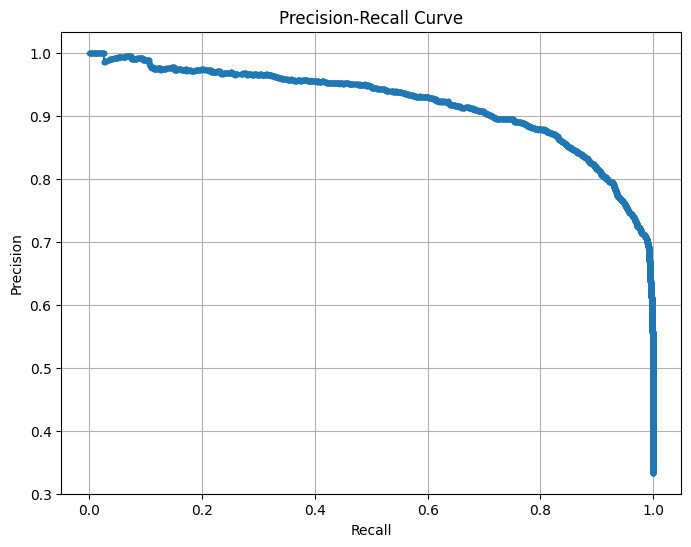


Classification Report (Threshold = 0.7):
               precision    recall  f1-score   support

           0       0.67      1.00      0.80      5175
           1       0.00      0.00      0.00      2587

    accuracy                           0.67      7762
   macro avg       0.33      0.50      0.40      7762
weighted avg       0.44      0.67      0.53      7762



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt

best_ada_model = grid_ada.best_estimator_
best_ada_model.fit(X_train_res, y_train_res)

y_probs = best_ada_model.predict_proba(X_test_res)[:, 1]

y_pred_default = (y_probs >= 0.5).astype(int)

print("ROC-AUC on Test Set:", roc_auc_score(y_test_res, y_probs))
print("\nClassification Report (Threshold = 0.5):\n", classification_report(y_test_res, y_pred_default))

precision, recall, thresholds = precision_recall_curve(y_test_res, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

custom_threshold = 0.7
y_pred_custom = (y_probs >= custom_threshold).astype(int)

print(f"\nClassification Report (Threshold = {custom_threshold}):\n", classification_report(y_test_res, y_pred_custom))


In [100]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers

print("Train shapes:", X_train_res.shape, y_train_res.shape)
print("Test shapes:",  X_test_res.shape,  y_test_res.shape)
print("NaNs in X_train_res:", np.isnan(X_train_res).any())
print("NaNs in X_test_res:",  np.isnan(X_test_res).any())

def build_mlp(input_dim):
    """Shallow MLP: two hidden layers with moderate dropout"""
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=optimizers.Adam(),
        loss='binary_crossentropy',
        metrics=[tf.keras.metrics.AUC(name='auc')]
    )
    return model


def build_deep_nn(input_dim):
    """Deeper NN: three hidden layers with reduced dropout and higher learning rate"""
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-2),
        loss='binary_crossentropy',
        metrics=[tf.keras.metrics.AUC(name='auc')]
    )
    return model



Train shapes: (31065, 11) (31065,)
Test shapes: (7762, 11) (7762,)
NaNs in X_train_res: From Bank             False
Account               False
To Bank               False
Account.1             False
Amount Received       False
Receiving Currency    False
Amount Paid           False
Payment Currency      False
Payment Format        False
Same Account          False
Same Bank             False
dtype: bool
NaNs in X_test_res: From Bank             False
Account               False
To Bank               False
Account.1             False
Amount Received       False
Receiving Currency    False
Amount Paid           False
Payment Currency      False
Payment Format        False
Same Account          False
Same Bank             False
dtype: bool


In [101]:
input_dim = X_train_res.shape[1]
mlp_model     = build_mlp(input_dim)
deep_model    = build_deep_nn(input_dim)

es = callbacks.EarlyStopping(monitor='val_auc', patience=5, mode='max', restore_best_weights=True)


history_mlp = mlp_model.fit(
    X_train_res, y_train_res,
    validation_split=0.1,
    epochs=50,
    batch_size=256,
    callbacks=[es],
    verbose=2
)

history_deep = deep_model.fit(
    X_train_res, y_train_res,
    validation_split=0.1,
    epochs=50,
    batch_size=256,
    callbacks=[es],
    verbose=2
)

Epoch 1/50
110/110 - 4s - 35ms/step - auc: 0.5696 - loss: 0.6802 - val_auc: 0.0000e+00 - val_loss: 0.8518
Epoch 2/50
110/110 - 0s - 4ms/step - auc: 0.6365 - loss: 0.5670 - val_auc: 0.0000e+00 - val_loss: 1.0897
Epoch 3/50
110/110 - 0s - 4ms/step - auc: 0.6581 - loss: 0.5455 - val_auc: 0.0000e+00 - val_loss: 1.2487
Epoch 4/50
110/110 - 0s - 4ms/step - auc: 0.6835 - loss: 0.5317 - val_auc: 0.0000e+00 - val_loss: 1.2228
Epoch 5/50
110/110 - 0s - 4ms/step - auc: 0.7093 - loss: 0.5150 - val_auc: 0.0000e+00 - val_loss: 1.2516
Epoch 6/50
110/110 - 1s - 6ms/step - auc: 0.7264 - loss: 0.5015 - val_auc: 0.0000e+00 - val_loss: 1.2153
Epoch 1/50
110/110 - 5s - 43ms/step - auc: 0.6353 - loss: 0.5673 - val_auc: 0.0000e+00 - val_loss: 1.3305
Epoch 2/50
110/110 - 1s - 5ms/step - auc: 0.6993 - loss: 0.5157 - val_auc: 0.0000e+00 - val_loss: 1.1747
Epoch 3/50
110/110 - 1s - 5ms/step - auc: 0.7197 - loss: 0.5016 - val_auc: 0.0000e+00 - val_loss: 1.3264
Epoch 4/50
110/110 - 1s - 5ms/step - auc: 0.7264 - lo

In [102]:
mlp_loss, mlp_auc = mlp_model.evaluate(X_test_res, y_test_res, verbose=0)
deep_loss, deep_auc = deep_model.evaluate(X_test_res, y_test_res, verbose=0)
print(f"MLP Test AUC: {mlp_auc:.4f}")
print(f"Deep NN Test AUC: {deep_auc:.4f}\n")

MLP Test AUC: 0.6230
Deep NN Test AUC: 0.7395



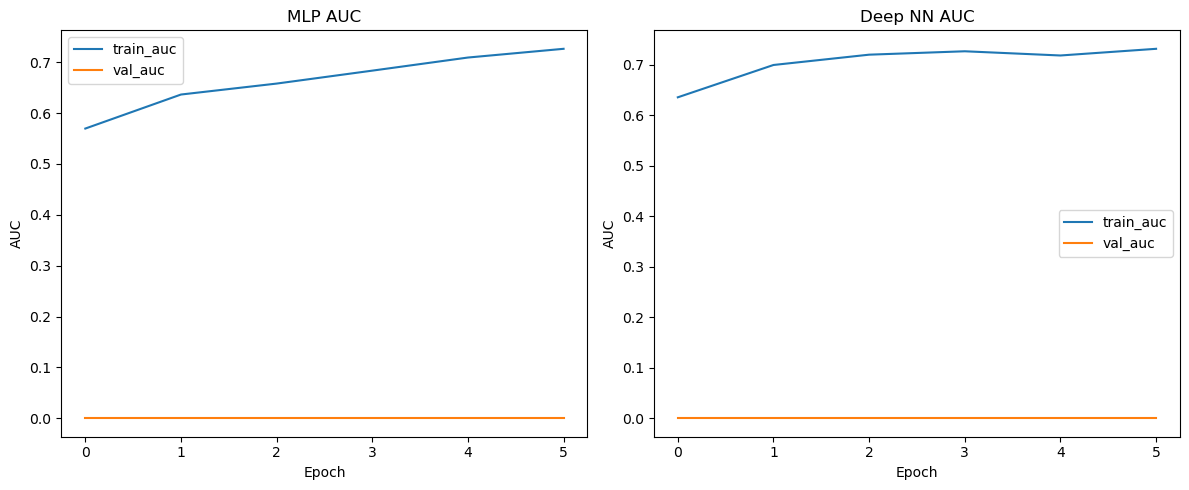

In [103]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_mlp.history['auc'], label='train_auc')
plt.plot(history_mlp.history['val_auc'], label='val_auc')
plt.title('MLP AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_deep.history['auc'], label='train_auc')
plt.plot(history_deep.history['val_auc'], label='val_auc')
plt.title('Deep NN AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.tight_layout()
plt.show()

In [104]:
y_pred_mlp  = (mlp_model.predict(X_test_res) >= 0.5).astype(int)
print("Classification Report for MLP:")
print(classification_report(y_test_res, y_pred_mlp))

y_pred_deep = (deep_model.predict(X_test_res) >= 0.5).astype(int)
print("Classification Report for Deep NN:")
print(classification_report(y_test_res, y_pred_deep))

243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report for MLP:
              precision    recall  f1-score   support

           0       0.70      0.90      0.79      5175
           1       0.54      0.24      0.33      2587

    accuracy                           0.68      7762
   macro avg       0.62      0.57      0.56      7762
weighted avg       0.65      0.68      0.64      7762

243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report for Deep NN:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      5175
           1       1.00      0.01      0.01      2587

    accuracy                           0.67      7762
   macro avg       0.83      0.50      0.41      7762
weighted avg       0.78      0.67      0.54      7762



243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Deep NN PR AUC: 0.5139


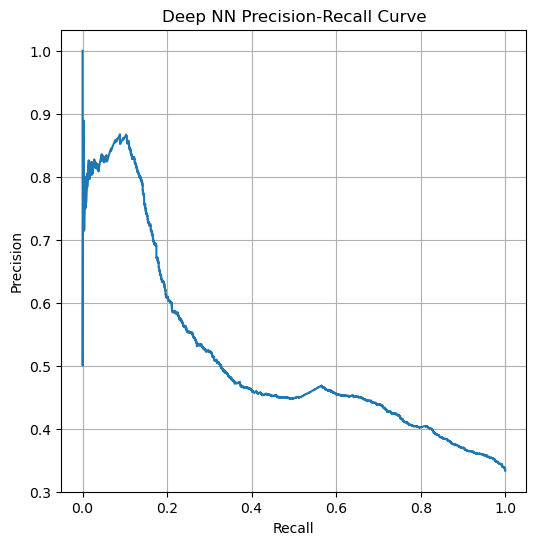

In [28]:
probs_deep = deep_model.predict(X_test_res).ravel()
precision, recall, thresholds = precision_recall_curve(y_test_res, probs_deep)
pr_auc = auc(recall, precision)
print(f"Deep NN PR AUC: {pr_auc:.4f}")

# Plot PR curve
plt.figure(figsize=(6,6))
plt.plot(recall, precision)
plt.title('Deep NN Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()